In [1]:
import numpy as np
import matplotlib.pyplot as plt

class solver():
    def __init__(self, coeffs):               
        self.a, self.b, self.c, self.d = coeffs

    def exact(self, T):
        exact_solution = []
        for x in np.linspace(0, 2, 200) - T:
            if 0.4 <= x <= 0.5:
                exact_solution += [10*x - 4]
            elif 0.5 <= x <= 0.6:
                exact_solution += [-10*x + 6]
            else:
                exact_solution += [0]
        return exact_solution
        
    def calc(self, steps):
        self.dt = 1/2 * .01
        self.solution = [self.exact(0), self.exact(self.dt)]
        for j in range(steps):
            y_last = np.array(self.solution[-1])
            y_last_2 = np.array(self.solution[-2])
            
            y_curr = np.zeros_like(y_last)        
            y_curr[:] += self.b * y_last + self.d * y_last_2
            y_curr[1:] += self.a * y_last[:-1]
            y_curr[2:] += self.c * y_last_2[:-2]

            self.solution.append(y_curr)
        

In [2]:
def coeffs(a,c):
    return [a, -3*a-4*c+2, c, 2*a + 3*c - 1]

In [3]:
first_order = [solver(coeffs(1/2,0)), solver(coeffs(2/3, 0)), solver(coeffs(0, 1/3)), solver(coeffs(0, 1/2))]

for i in range(4):
    first_order[i].calc(200)

Text(0.5, 0.98, '1п')

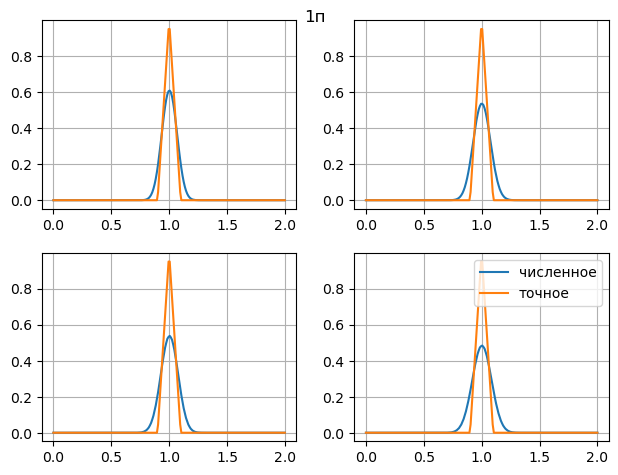

In [4]:
fig, ax = plt.subplots(2, 2)
fig.tight_layout()
points = np.linspace(0, 2, 200)
for k in range(4):
    x = k%2
    y = k//2
    ax[y][x].plot(points, first_order[k].solution[100], label = "численное")
    ax[y][x].plot(points, first_order[k].exact(first_order[k].dt*100), label = "точное")
    ax[y][x].grid()
plt.legend()
plt.suptitle('1п')

Text(0.5, 1.0, '2п')

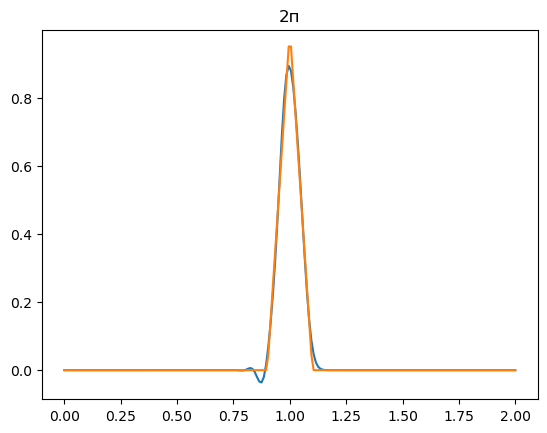

In [5]:
second_order = solver(coeffs(0.466666666666667, -0.0666666666666667))
second_order.calc(100)
plt.plot(np.linspace(0, 2, 200), second_order.solution[100])
plt.plot(np.linspace(0, 2, 200), second_order.exact(second_order.dt*100))
plt.title('2п')

Text(0.5, 1.0, '4п')

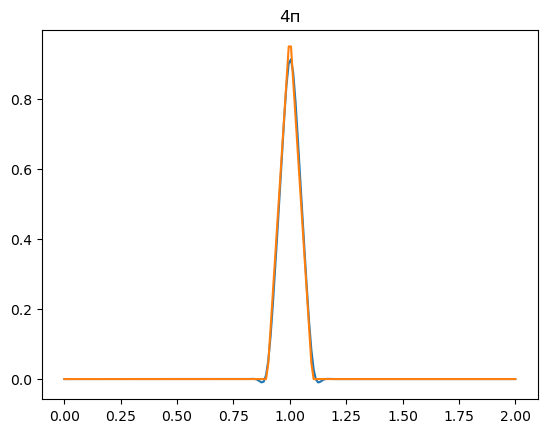

In [6]:
third_order = solver(coeffs(2/3, -1/6))
third_order.calc(100)
plt.plot(np.linspace(0, 2, 200), third_order.solution[100])
plt.plot(np.linspace(0, 2, 200), third_order.exact(third_order.dt*100))
plt.title('4п')